In [1]:
# Outside imports
import os
import importlib
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

In [2]:
# os.chdir('../')

In [3]:
import data_util.config
importlib.reload(data_util.config)
from data_util.config import *

In [4]:
!pwd

/Users/rowancassius/Desktop/capstone/LSTM_Summarizer


In [5]:
log_root

'/Users/rowancassius/Desktop/capstone/LSTM_Summarizer'

In [6]:
result_path = os.path.join(log_root, results_path)

In [37]:
df = pd.read_csv(os.path.join(result_path, 'results_wpt.tsv'), sep = '\t')
# df = pd.read_csv(os.path.join(result_path, 'test_results_with_art.csv'), sep = '\t')

In [38]:
df

,context,task,ref,decoded
0,"I think this would be a good discussion to have on Friday, because we should have more information on the GE7FAs and should have already spoken with TECO on their proposed MOU and maybe even the tolling agreement . What are your schedules on Friday? I also would like to schedule a call for tomorrow with TECO to go over the MOU.",Fred - Please coordinate with Kay and schedule something with Becky Alex.,coordinate with Kay and schedule something with Becky Alex,schedule Fred - Please coordinate with Becky Alex
1,"I want to inform you that a resolution has been signed effective Aug. 27, 2001 naming Jesse E. Neyman as a Vice President of LRCI, Inc.","If you would like a copy of this resolution, please send me your physical address and I'll send you a copy via inter-office mail.",send physical address to SENDER,send physical address to sender
2,"Jeff, We are also usually sent a page from some tax book that show the rate of withholding for each of the treaty countries. Their rate of withholding will impact which form we may or may not need.",Can you send it to me?,send SENDER the rate of withholding for each of the treaty countries,send to sender
3,"PLEASE NOTE:. The above mentioned meeting has been rescheduled and confirmed for Wednesday, February 21, 2001 from 11:15 am - 12:15 pm. Please join Keith Dodson and John in BoardRoom 3AC4C1. Lunch will be provided.",Please attend or call in if you can.,attend meeting with Keith Dodson and John,attend or call
4,Attached is a report for significant changes in nom'd and sched'd volumes by cycle.,Please review and let me know how we want to tweek the report to give us all the information we need.,review report for significant changes in nom'd and sched'd volumes by cycle and respond to SENDER,review report
...,...,...,...,...
555,NaN,Please give me a call when you have a chance.,call SENDER,call sender
556,Rebecca:,Please follow up on this.,follow up on this,follow up on this
557,NaN,Please forward comments to Jerry Fox.,forward comments to Jerry Fox,forward comments to Jerry Fox
558,NaN,Please respond to pacstar,respond to pacstar,respond to [UNK]


In [39]:
pd.set_option('display.max_colwidth', -1)

In [40]:
from rouge import Rouge

In [41]:
scores = Rouge().get_scores(df['decoded'].map(lambda x: x.lower()), 
                            df['ref'].map(lambda x: x.lower()), 
                            avg = True)

In [42]:
Rouge().get_scores('respond to Rogelio', 'respond to Rogelio L', avg = True) 

{'rouge-1': {'f': 0.8571428522448981, 'p': 1.0, 'r': 0.75},
 'rouge-2': {'f': 0.7999999952000001, 'p': 1.0, 'r': 0.6666666666666666},
 'rouge-l': {'f': 0.8571428522448981, 'p': 1.0, 'r': 0.75}}

In [43]:
# prev scores
scores

{'rouge-1': {'f': 0.6246012619259179,
  'p': 0.7307787698412702,
  'r': 0.5949822874954176},
 'rouge-2': {'f': 0.3966156426120457,
  'p': 0.4730038265306122,
  'r': 0.381483452063809},
 'rouge-l': {'f': 0.6180453764345568,
  'p': 0.7225885770975058,
  'r': 0.586240334566227}}

### Calculate Individual Scores

In [44]:
def score(r):
    scores = Rouge().get_scores(r.decoded, r.ref)[0]
    return [scores['rouge-1']['f'], scores['rouge-2']['f'], scores['rouge-l']['f']]

In [45]:
scored_examples = [score(r) for r in df.itertuples()]

In [46]:
df = pd.concat([df, pd.DataFrame(scored_examples, columns=['Rouge-1', 'Rouge-2', 'Rouge-L'])], axis=1)

In [48]:
df[['task', 'ref', 'decoded']].sample(10).head()

,task,ref,decoded
160,Everyone in the first two rows excluding real time please shut down your computer before leaving tonight.,shut down computer before leaving,shut down your computer
528,Can you please help me by contacting the appropriate individuals at Smurfit and try to clarify the credit picture.,contact Smurfit to clarify credit picture,help sender
17,Please review the following:,review the following,review following
297,"Sara: When you have a chance, would you forward me a sample confirmation for one of the above referenced trades?",forward sample confirmation,forward [UNK] to sender
529,"Please price these 2 new units and charge them to Co. # 0413, RC # 107043.",price new units and charge,price 2 new units and charge them


In [114]:
df.shape

(560, 7)

In [113]:
df.drop_duplicates(['context','task'])

(546, 7)

In [78]:
df.mean()

Rouge-1    0.543560
Rouge-2    0.287241
Rouge-L    0.544467
dtype: float64

In [165]:
# samp = df[ df['decoded'].map(lambda x: len(x.split())) > 5].drop_duplicates(['context','task']).sample(10)
samp = df[df['Rouge-1'] < 0.2].sample(10)
print(samp['Rouge-1'].mean())

0.05538461448426037


In [166]:
samp

,context,task,ref,decoded,Rouge-1,Rouge-2,Rouge-L
24,Opps. Didn't mean to leave you out! I'm attaching the notices for CA I and CA II.,"Please pay particular attention to CA II, since it is the first time it has been circulated.",watch for ca ii,pay attention to CA II,0.000000,0.0,0.000000
554,NaN,Could you please take a moment to rspond on the attached.,relpy on attached,take a moment,0.000000,0.0,0.000000
113,"Each day Heather will take another fifth of the volume in 585480 and put it into 586775, and she'll average the fixed prices each day to eventually end up with the last 5-day average. That's the long and short of why this new forward deal - 586775 - doesn't need to be confirmed. Our position with Deseret stays the same - it's just split between two deals temporarily.",Please call Heather or me with any questions.,call heather or SENDER with questions about deals 586775 and 585480,call Heather,0.153846,0.0,0.153846
518,"Sorry, it was on the slow boat, in interroffice mail back from Steve, I just got it. I'll fax a copy back to the company today and follow with an original by fedex this everning. Thanks.",Can you mail me when you get it?,email SENDER,mail sender,0.000000,0.0,0.000000
353,"I suspect that you will be involved in a lot of advice/counselling in the next few weeks as this transition occurs. If you are available on Friday, I would like to have a phone introduction of you and Hoyt. Would you please call my assistant, Twanda Sweet, at 713-8536-401 , to let her know your availability so that she can set up a conference call? Thanks a lot.","Twanda, would you please set this up when Pat calls?",schedule conference call,set this up when Pat calls,0.000000,0.0,0.000000
207,NaN,Thank you.,check deal no 500771,thank,0.000000,0.0,0.000000
477,NaN,"Kay, can you make sure I am available",check SENDER 's schedule,ensure sender is available,0.000000,0.0,0.000000
42,"Vangie, Attached is a draft of our Master Agreement for your review.","Upon your review, please give me a call to discuss.",call SENDER to discuss draft of master agreement,call sender,0.200000,0.0,0.200000
129,"Please inform me, with regard to paragraph 6 a ix 1 , as to what, if anything, should be inserted for the event of default threshold amount. I have also copied Susan Musch on this email, so that she can determine if all is well from the tax perspective.","Once Susan signs-off from the tax perspective, please inform me as to what needs to be done to load the GTCs, noting that the existing EOL GTCs for Japanese weather, are utilizing Enron Australia Finance Pty.",inform SENDER of needs to load the gtcs,inform sender,0.200000,0.0,0.200000
376,These changes are fine.,"May and Kathleen, would you please coordinate who is going to get the redraft to Dynegy.",talk to Kathleen about redraft,coordinate who,0.000000,0.0,0.000000


In [143]:
samp

,context,task,ref,decoded,Rouge-1,Rouge-2,Rouge-L
134,"Jeff, attached is George's review for tomorrow.","Please review thoroghly, add and make changes and be sure to check for errors.",review and edit George 's review,review thoroghly,0.250000,0.000000,0.285714
228,"Also, Stephanie, reminder that I believe that we still have not sent a signed Tax Form to Bear re: Enron Credit Inc. although we did so for Morgan . In any case, Mike Bruegel at Bear says he does not have it. Please send one to him. His phone number is 312-6633-253 . This did not affect the opening of the account but they still need it.",Please make sure that in fact we also sent one to Goldman.,verify a signed Tax Form was sent to Goldman,ensure fact in Goldman,0.153846,0.000000,0.153846
527,NaN,Please print the attachment.,print attachment,print the attachment,0.800000,0.000000,0.800000
533,"Cooper Richey's leaving West Power Fundamentals for a challenging new post in the frozen North, and everyone's invited to the sendoff! Join us at the Lucky Lab to say farewell, hoist a few, and learn about the latest snowshoe technology!",Please mark your calendars:,put sendoff in calendar,[UNK],0.000000,0.000000,0.000000
270,NaN,"deal, please make sure that your audience traders, myself, etc. knows that",ensure audience traders and SENDER know that,ensure your audience traders,0.545455,0.222222,0.545455
236,I definitely think we should let customers know as needed basis. Someone should certainly talk to ENA.,"Terry, please work with Jean on this.",work with Jean to let customers know about it,work with Jean,0.500000,0.400000,0.500000
76,"Shirley,","Please, put a regular Enron NA meeeting on Mondays at 9:30 to 11:00.",schedule regular Enron na meeeting on Mondays at 9:30 to 11:00,put a regular Enron on Mondays,0.470588,0.266667,0.470588
105,Rick --. Attached are my top 3 objectives underway / accomplishments for EGM and Enron Networks. I've included only one accomplishment since the group is just getting up and running. Please let me know if you have any questions / comments.,Ginger -- please put these into slide format.,put these into slide format,put these into slide format,1.000000,1.000000,1.000000
151,"Khairuddin, Thanks for your message. The fax has been sent. Vince",KhairuddinBMJaafar@petronas.com.my on 01/17/2001 01:50:36 AM Please respond to khairuddin mjaafar@petronas.com.my To: vkamins@ect.enron.com cc: azminab@petronas.com.my Subject: Petronas benchmarking visit,respond to khairuddin at mjaafar@petronascommy,respond to khairuddin,0.750000,0.666667,0.750000
26,NaN,Please unwind the deals listed and have confirms go out to the external c/p on the unwinds.,unwind listed deals,unwind the deals,0.666667,0.000000,0.666667


In [80]:
samp

,context,task,ref,decoded,Rouge-1,Rouge-2,Rouge-L
52,"Wow, I didn't know I could control anything! Change order 2 was initialled by Dale and signed by Chris on November 2, re stack extensions. I also have a hand marked up change order form from Ed Danhaus referring to brush power system stabilizers.",Would you let me know if this is what you're looking for?,confirm this is correct,let sender,0.000000,0.000000,0.000000
181,The General Presentation is designed to educate the students on Enron and the Global Technology Track. Following the presentation we will invite the students to ask questions about Enron and the Global Technology Track. Please plan to arrive at the General Presentation by 6:00 p.m. It is business casual attire. FLIGHT ARRANGEMENTS:. You are responsible for scheduling your own flight arrangements with your preferred airline provider.,"Please schedule your flight to arrive to the San Francisco airport on Monday, October 16th.",schedule flight to San Francisco,schedule flight,0.571429,0.400000,0.571429
122,"Attached is a rough draft, but I wanted to get you something before I left.",Please review and call me with any comments.,review rough draft,review draft,0.800000,0.000000,0.800000
417,"You bought 100 shares of CIEN Ciena Corp Com at 97.000000. ORDER DETAILS: The tracking number for this order is: B-300-AAZC-4408 Order entered at: 10:03:11 on 11//00 Order processing began at: 10:03:11 Order executed at: 10:03:30 on 11//00. You will receive a printed Datek Online confirmation by postal mail, or by electronic delivery if you are subscribed to that service. Questions regarding this transaction? Contact our Customer Support department by e-mailing support@datek.com.",Please reference the order tracking number.,reference the order tracking number,reference order tracking number,0.888889,0.571429,0.888889
1,"I want to inform you that a resolution has been signed effective Aug. 27, 2001 naming Jesse E. Neyman as a Vice President of LRCI, Inc.","If you would like a copy of this resolution, please send me your physical address and I'll send you a copy via inter-office mail.",send physical address to SENDER,send physical address to sender,0.800000,0.750000,0.800000
429,NaN,"P.S. Shirley, please send 2 copies to Thomas.",send 2 copies to thomas,send copies to Thomas,0.666667,0.285714,0.666667
256,"the Sisters Damnation. Electric lounges, armadillos, and Do-Wacka-Do. Texas tornados. Broken spokes. Pat Green, Gruene Hall, and Lubbock on everything . Lucky Dogs, Lost Gonzos, and lots and lots of Gourds. Whatever Willie Nelson says it is. * * * * * * * * * * * * * * * * * * * *. 2. Mission Statement. LoneStarMusic.com wants to provide an outlet for independent, roots-aware Texas musicians.","As for what those roots are, please reference previous section .",reference previos section for roots,reference previous section,0.500000,0.000000,0.500000
186,NaN,"Tanya, Please review the attached document regarding our conversation concerning the back to back arrangement.",review attached document,review document,0.800000,0.000000,0.800000
275,"Thank you for the invitation. Unfortunately Debbie and I will not be able to attend due to previous committments. I would like to invite you and a guest to join me for the annual Juvenile Diabetes Foundation Gala to be held on May 12, 2001 at the Westin Galleria. The guest speaker this year will be General Norman Schwarzkof.",Please contact Cathy Phillips X-36898 and let her know if you are interested in attending.,contact Cathy you are attending,contact Cathy Phillips X-36898,0.444444,0.285714,0.444444
175,NaN,Please fax the Winston & Strawn changes to Kathy Clark.,fax changes to Kathy Clark,fax the Winston & Strawn changes to Kathy Clark,0.714286,0.500000,0.714286


In [75]:
samp #[['Context', 'task', 'ref', 'decoded']]

,context,task,ref,decoded,Rouge-1,Rouge-2,Rouge-L
454,The reason s for the change is due to the lines being de-energized for CB test. The first applicable Hour Ahead market to run with these values is HE 1100. The ISO will update you of any changes in line rating status.,"Sent by Market Operations, inquiries please call the Hour Ahead Desk.",call Hour ahead desk,call the Hour Ahead Desk,0.444444,0.000000,0.444444
375,"Gentlemen, This is now back to being the CA Development I and II deal. Please change the name.","Please send it to me and Lee Johnson tomorrow, if possible.",send deal to Lee Johnson and SENDER,send name to sender,0.363636,0.000000,0.363636
544,"Thanks Denise. df. To All -. Just a follow-up message to each of you about the iBuyit program. I am still in need of a designated volunteer from each of your groups to act as a Change Agent for this program. Since it is a Corp. initiative and will be implemented over time, I need to make sure all areas of the Legal Dept. are on board.",Please provide me with the name of at least one person within your group who fits the Change Agent bill.,give SENDER name of person in your group,provide sender with name,0.166667,0.000000,0.166667
80,"* January 16, 2002, 9:00 a.m. - 2:00 p.m.: Municipal Utilities. * January 17, 2002, 9:00 a.m. - 2:00 p.m.: Other Control Areas. If you would like to participate in one of these discussions, please select the one that most closely matches your company's primary market involvement. To keep the discussions focused and due to limited space availability, we request that only one representative per organization attend one of the above targeted meetings.","If you plan to attend a session in person, and have not already responded, please rsvp by the close of business Friday, January 4, 2002, to Julia Payton at jpayton@caiso.com mailto:jpayton@caiso.com .","rsvp by Friday, January 4, 2002 , to Julia Payton at jpayton@caisocom","rsvp at business Friday, January 4, 2002",0.631579,0.352941,0.526316
374,Federal jurisdiction and limit of liability verbage. That's what comes to mind at this point.,Could you email me the most current version I think it was March 3 ?,email latest version to SENDER,email sender,0.285714,0.000000,0.285714
217,NaN,Please prepare language per terms of the attached credit worksheet and provide such language to Barry T. and Kim W. for review.,prepare language and provide it to Barry T and Kim W,prepare language per credit worksheet,0.250000,0.142857,0.266667
352,"And Enron made an astronomical profit during the California energy crisis last year. As a result, there are thousands of consumers who are unable to pay their basic energy bills and the largest utility in the state is bankrupt. The New York Times reported that you sold 101 million worth of Enron stock while aggressively urging the company's employees to keep buying it.",Please donate this money to the funds set up to help repair the lives of those Americans hurt by Enron's underhanded dealings.,donate money to funds to help Americans hurt by Enron 's underhanded dealings,donate this money,0.250000,0.000000,0.266667
200,Peter Keohane thought the brief memo below may be of interest to you it relates to the Canadian securities representation to be contained in the Weyerhaeuser Company Limited ISDA .,"If you have any questions, concerns or comments with respect to the memo, please give me a call.",call SENDER,call sender,0.500000,0.000000,0.500000
94,NaN,FROM: Enron Property & Services Corp,call parking and transportation,contact [UNK],0.000000,0.000000,0.000000
316,NaN,Check out the latest version of Enron Business Online at home.enron.com.,see latest version of Enron business online,check out latest version of Enron business online online,0.750000,0.714286,0.800000


In [132]:
df.corr()

,SumWC,TaskWC,ContextWC,DecWC,Rouge-1,Rouge-2,Rouge-L
SumWC,1.000000,0.342327,0.053455,0.290364,-0.330362,-0.247552,-0.328497
TaskWC,0.342327,1.000000,0.196285,0.169608,-0.232996,-0.163044,-0.231761
ContextWC,0.053455,0.196285,1.000000,-0.037809,-0.054655,-0.014152,-0.053624
DecWC,0.290364,0.169608,-0.037809,1.000000,0.057514,0.051436,0.068529
Rouge-1,-0.330362,-0.232996,-0.054655,0.057514,1.000000,0.857938,0.989654
Rouge-2,-0.247552,-0.163044,-0.014152,0.051436,0.857938,1.000000,0.861845
Rouge-L,-0.328497,-0.231761,-0.053624,0.068529,0.989654,0.861845,1.000000


There is a weak linear correlation (0.3) between the numer of words in the task sentence and the quality of the summary

In [133]:
import matplotlib.pyplot as plt

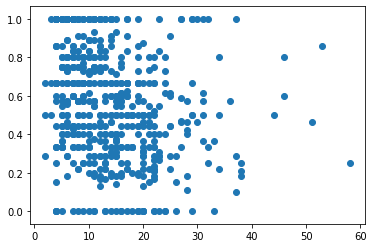

In [134]:
plt.scatter(df['TaskWC'], df['Rouge-1'])

In [135]:
df.describe()

,SumWC,TaskWC,ContextWC,DecWC,Rouge-1,Rouge-2,Rouge-L
count,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000
mean,5.496454,14.053191,27.939716,3.537234,0.551547,0.329247,0.551395
std,2.905557,8.366431,26.347384,1.504415,0.281662,0.350228,0.284679
min,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,3.000000,8.000000,1.000000,2.000000,0.333333,0.000000,0.333333
50%,5.000000,12.000000,20.000000,3.000000,0.563492,0.250000,0.545455
75%,7.000000,19.000000,55.000000,4.000000,0.750000,0.508333,0.800000
max,17.000000,58.000000,75.000000,11.000000,1.000000,1.000000,1.000000


Univariate distribution of rouge 1 scores:

In [86]:
import matplotlib.pyplot as plt

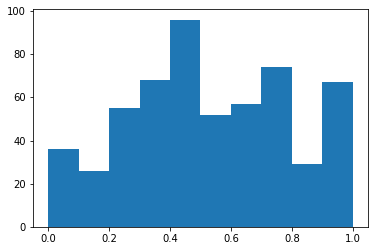

In [87]:
plt.hist(df['Rouge-1']); plt.show()

Analyzing perfect predictions:


In [136]:
(df['Rouge-1'] > 0.95).sum()

72

In [137]:
df[df['Rouge-1'] > 0.95].shape

(72, 11)

In [144]:
df[df['Rouge-1'] > 0.95][['Context', 'TaskSentence', 'ref', 'decoded']].sample(10)

,Context,TaskSentence,ref,decoded
537,nan,Please confirm the dates; November is already past.,confirm dates,confirm dates
497,"Tana -- Here it is, finally.",Could you send me the document and I'll get the proper signatures.,send document to SENDER,send document to SENDER
380,"3454-693. Hi Stephanie, I will get the final version of ECT - Goldman International agreement by the end of the day onThursday and there is a lot of pressure to get it executed right away. Tomorrow can you prepare and execute the accompanying documents. For ECT's Authorized Traders List, you need to add Mark Schlueter doublecheck spelling and phone number to the list of traders. This is a HIGH priority.",Please also revise the the trader list for both the ENA add Peter Schluter and ECT add Mark in order to execute the Deutsche Bank agreements we discussed today.,revise trader list,revise trader list
514,Carlos Hernandez has resigned his position with Enron.,Please remove him from all your mail lists.,remove Carlos Hernandez from mail lists,remove Carlos Hernandez from mail lists
24,"??? ??? ?? 713-2472-545 ? ? Parking Instructions ? At the corner of Walker and Bagby merge to the extreme left lane on Walker and enter the Theater District Parking ramp. At the base of the ramp turn left sharp and park under the covered deck. Enter City Hall through the double doors, go down the escalator and walk straight through the tunnel. At the 3 elevators enter and choose 3rd floor.",Please check in with receptionist upon arrival.,check in with receptionist,check in with receptionist
418,Louisiana North to IH 10 West on ramp. Allen Parkway to Studemont or Waugh to IH 10. West Gray to Montrose North Studemont to IH 10. Bagby W. Dallas to Montrose North Studemont to IH 10. San Jacinto to IH 10 East. North on main to IH 45. Travis to IH 45. The Downtown District is updating it's web site with detailed road closure maps and suggested alternate routes. This information is available at http://www.downtownstreets.com.,Please check this site regularly for updates on street closures.,check site for updates,check site for updates
203,"1 Would a gas compression service deal be required to be filed by the FERC? My sence is that the answer is no. This is simply an O&M service contract and lease agreement. 2 If a Pipeline is on an annual gas tracker, what would be the tracker implication? It should be flat, as technically, ECS has not changed the amount of fuel collected/utilized..we have only provided optionality as to hedgeing?? ?",Please give me a call to discuss.,call SENDER,call SENDER
106,nan,"Thanks , could you call Richard to talk though approach and strategy and then ensure that he is also kept fully in the loop as you go forward .",call Richard,call Richard
325,"Julianne,","Please address Cooper's questions, or forward to the Calgary office.",address Cooper 's questions,address Cooper 's questions
60,"I have underlined the additional language in the attached revised discount letter language will not be underlined when provided to Phillips . The inclusion of this language would require Transwestern to file the discount as a negotiated rate prior to gas flow under the term of the amendment. Transwestern would file this discount on January 31, 2001.",Please review the attached document and indicate approval via REPLY WITH HISTORY.,review document,review document


Many of the perfect summaries have fewer words, and involve 'Call'

## Most of the perfect summaries are 'call SENDER' summaries

Get subset of non Call messages

In [145]:
df2 = df[~(df['ref'].map(lambda x: 'call' in x))]

In [147]:
df2.shape

(494, 11)

In [150]:
df2.describe()

,SumWC,TaskWC,ContextWC,DecWC,Rouge-1,Rouge-2,Rouge-L
count,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000
mean,5.641700,14.287449,27.526316,3.668016,0.528782,0.292980,0.528348
std,2.900507,8.466517,26.588867,1.489350,0.274639,0.327682,0.278230
min,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,4.000000,8.000000,1.000000,3.000000,0.333333,0.000000,0.333333
50%,5.000000,13.000000,19.000000,4.000000,0.500000,0.222222,0.500000
75%,7.000000,19.000000,54.750000,4.000000,0.750000,0.500000,0.750000
max,17.000000,58.000000,75.000000,11.000000,1.000000,1.000000,1.000000


When erasing summaries involving call, rouge-1 only slips 3 points, from 55 to 52

In [151]:
df2.corr()

,SumWC,TaskWC,ContextWC,DecWC,Rouge-1,Rouge-2,Rouge-L
SumWC,1.000000,0.337489,0.058604,0.241931,-0.258433,-0.156367,-0.257938
TaskWC,0.337489,1.000000,0.230229,0.138042,-0.243734,-0.171736,-0.242506
ContextWC,0.058604,0.230229,1.000000,-0.054535,-0.085363,-0.040303,-0.083945
DecWC,0.241931,0.138042,-0.054535,1.000000,0.135176,0.153260,0.146936
Rouge-1,-0.258433,-0.243734,-0.085363,0.135176,1.000000,0.831250,0.987686
Rouge-2,-0.156367,-0.171736,-0.040303,0.153260,0.831250,1.000000,0.836947
Rouge-L,-0.257938,-0.242506,-0.083945,0.146936,0.987686,0.836947,1.000000


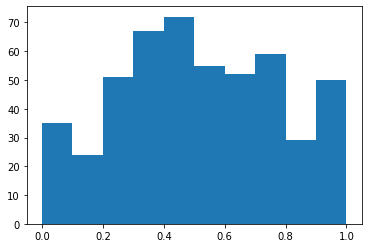

In [152]:
plt.hist(df2['Rouge-1']); plt.show()

In [153]:
df2[['Context', 'TaskSentence', 'ref', 'decoded']].sample(20)

,Context,TaskSentence,ref,decoded
24,"??? ??? ?? 713-2472-545 ? ? Parking Instructions ? At the corner of Walker and Bagby merge to the extreme left lane on Walker and enter the Theater District Parking ramp. At the base of the ramp turn left sharp and park under the covered deck. Enter City Hall through the double doors, go down the escalator and walk straight through the tunnel. At the 3 elevators enter and choose 3rd floor.",Please check in with receptionist upon arrival.,check in with receptionist,check in with receptionist
539,nan,Please take the variances through 0009 to the desk.,take variances to desk,take the variances through to desk
91,We need this agreement to be month-to-month. There is a possibility that HPL may be off this tower in a few months.,"Please get with Nathan Hlavaty with any questions, because I will be out of the office until May 30.",ask nastan Hlavaty questions,get Nathan Hlavaty with questions
31,"I'm remotely accessing this while travelling and have been unable to open the videos. This is likely a function of the remote connection. Ken and Jeff, I'll review each of yours when I'm better able to access. I'll then provide you my comments if any , as you will need to sign off on the release and use of these by Harvard.","Louise, will you please review at least your portion?",review your portion,review at portion
82,"Debra -. Attached is a worksheet for another new Master Firm Purchase/Sale, this time for Tucson Electric Power Company. Please prepare a draft and send to:. Mr. Dave Hutchens Tucson Electric Power Company One South Church Street Tucson, AZ 85701",Please also send a copy of draft to Kim Ward EB3204A and one to me EB2860 .,send a copy of draft to Kim Ward at eb3204a and SENDER at eb2860,send copy of draft to SENDER
179,nan,Please add to my personal contact list,add to SENDER 's personal contact list,add to personal contact list
443,"If anything, life sucks worse. There is a guy retiring today and I'm basically supposed to replace him on this project, but I've been so busy with other projects that I haven't had any time to pick his brain. So I am fucked but large.",Send the package to the office.,send package to the office,send package to office
130,"Kim, please forward to the traders. I think the schedulers have this already.",Please forward: Room Change,forward room change,forward room change change
448,"Mark, Paul would like to start his roadshow with Australian customers next Tuesday Monday afternoon, our time .","Could you please review the amendments which David Minns has recommended for the PA and ETA today, so that Paul can take a copy of at least the PA with him when he visits the customers?",review amendments,review amendments which David Minns
75,ALL. Attached is the initial draft of the Strategic Energy TF Report. This report is for your review and comment at the meeting on 10 Jan 01. The meeting is scheduled from 6:00 pm to 9:00 pm in NYC and 5:00 pm to 8:00 pm in Houston. We expect 32 participants.,Please provide comments to the project director Amy Jaffe or the task force chair Ed Morse.,provide comments to Amy Jaffe or Ed Morse,provide comments to Amy Jaffe


Notes:
* maybe the model needs access to vocabulary like 'ensure' and 'turn this'
* SENDER is occasionally used incorrectly, Send this to SENDER -- instead of email
* perhaps we could use some corrective rules, "on SENDER" -> on SENDER's calendar
    * check that SENDER
* we need to have special handling of ASAP

    
    
In some cases the model produces a better summary than the human in terms of conciseness, indicating there are enough concise summaries for it to do well. Example.

Task: 'Rhonda: I'm pretty certain that the matrix already designates the WSPP for this CP but if it does not, please revise the matrix'

Human Summary: 'revise matrix if it does n't designate the wspp for this cp	'

Predicted Summary: 'revise matrix'

In [1]:
df2[df2['Rouge-1'] < 0.3][['Context', 'TaskSentence', 'ref', 'decoded']].sample(30)

NameError: name 'df2' is not defined

Notes on bad predicions:
* Occasionally the task sentence is nonsense and should be replaced. eg. "-Origin: Taylor-M X-FileName: mtaylor.nsf"
* In general however, they are not bad

In [158]:
df[df['Rouge-1'] < 0.1][['Context', 'TaskSentence', 'ref', 'decoded']]

,Context,TaskSentence,ref,decoded
8,", photo gifts and all the other great services on Kodak PhotoNet online, so have fun trying new ways to use photos! For reference the access code for the roll that has been shared is: MY00MOOR981601. After logging into your account, all of your online rolls will appear. YouOll have 4 fun areas to choose from including:","VIEW AND SHARE: View your photos in thumbnail size or larger views, share a roll, email select pictures, download photos, send a photo photo postcard, or add a caption.",view photos,send email photo
12,"Thanks -Jackie- 3-9497. I extended the deal at mtr 6719 to include 2/10. In the future, please run all wellhead deals through Tom Acton first. I've got a message into Julie Meyers to look into the contract at meter 9676, and will let you know what she determines. D. Hi Daren, Can you please check into whether or not the below deals for the above meters can be rolled and extended?","If so, can you please perform this for me so that Anita can set up an accounting arrangement for me?",check if deals can be rolled or extended,perform this for SENDER
21,"The meeting is scheduled from 10 AM to 3 PM. As a prudent response to the tragic events of Sept 11th, PG&E has increased security measures at its 77 Beale/245 Market complex. These measures necessitate the following for attendance to the Oct 9th, San Francisco Planning Group meeting: Please RSVP by no later than close of business, Wednesday, Oct 3rd to Dalisay Ledy Torres at email preferred address DST2@pge.com or 415-9731-392 .","In your email response, please state you will be attending the Oct 9th San Francisco Planning Group meeting and who you will be representing.",rsvp Oct 9th San Francisco Planning Group meeting,email response
22,In situations where ENA has sold protection and .Com has bought protection on the same name this internal structure will permit ENA immediately Delivering on the Portfolio of Deliverable Obligations it as received as the Seller of protection to .Com which can in turn can Deliver on to the counterparty it has bought protection from. As a result all hedged trandsactions should have matched terms regardless of the Enron booking entity.,"Mark, Paul can you add further clarification as to the position particularly where I haven't hit the mark !",clarify the position,add clarification
38,"As of this moment, 68 percent of divers taking the survey are not changing existing travel plans. Of the 32 percent who are changing their plans, about 90 percent are only changing the dates or the destination of their travel. That means only 10 percent of divers taking the survey are permanently canceling their trips.","Please do your best to support the airline, hospitality, and resort sectors of the world economy and book a dive trip soon.",book a dive trip,do survey
52,"*~*~*~*~*~*~*~*~*~*~*~*~* Daily Riddle ~*~*~*~*~*~*~*~*~*~*~*~*~*. Today's Riddle is -. #1. Forward I am heavy, backward I am not. What am I? #2. What occurs once in every minute, twice in every moment, yet never in a thousand years? As always, you will find the answer below today's sponsor.",Please take a moment and visit today's sponsor-,visit sponsor,take answer 's today
53,"While I understand this is short notice, in case you are in New York on that date and also available for dinner, we will be delighted if you could join us. Rajat, Dean Jacobs, and a number of other Board members and supporters will also be there.",Please block off the date on your calendar and let me know if it is possible for you to attend.,check you can go to dinner,block off calendar
67,I just did a request to get Angela Davis in the Houston Office and Linda Sietzema and Sharon Crawford in the Calgary offices edit access to the Financial Trading Agreement Database. I also requested that Marcus Nettelton get edit access to the ENA Legal Online Trading Database.,I'm not sure if I did the erequest all ok. Can you check to make sure your got all four?,ensure you received all 

## Calculating Baseline Summary Scores 

use the task sentences themselves as summaries and check the scores

In [161]:
Rouge().get_scores(df['TaskSentence'], df['ref'], avg = True)

{'rouge-1': {'f': 0.3810508422187367,
  'p': 0.297803599452422,
  'r': 0.6383575911931673},
 'rouge-2': {'f': 0.19306868112126727,
  'p': 0.1507953749930362,
  'r': 0.321844083812169},
 'rouge-l': {'f': 0.37933693381558636,
  'p': 0.29755975056577855,
  'r': 0.6234437315280559}}

This serves as evidence that our summarization is better than a naive baseline of coping the task sentence